<a href="https://colab.research.google.com/github/aartikushal/DATA-VISUALIZATION-ASSIGNMENT/blob/main/DATA_VISUALIZATION_ASSIGNMENT_PART2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step-by-Step Approach to Data Visualization:
1. Setup and Data Loading:
- Import necessary libraries: pandas, matplotlib, and seaborn.
- Load the Iris dataset and the Diabetes dataset for visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier plots
sns.set(style='whitegrid')


In [2]:
# Load Iris dataset from seaborn
iris = sns.load_dataset('iris')

# View first few rows
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
# Load Diabetes dataset from local CSV
diabetes = pd.read_csv('diabetes.csv')

# View first few rows
print(diabetes.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# ***2. Exploratory Data Visualization:***

- Create histograms, scatter plots, and correlation matrices to explore the datasets' structures
and characteristics.
- Use visualization techniques to understand the distribution and relationships between
variables.

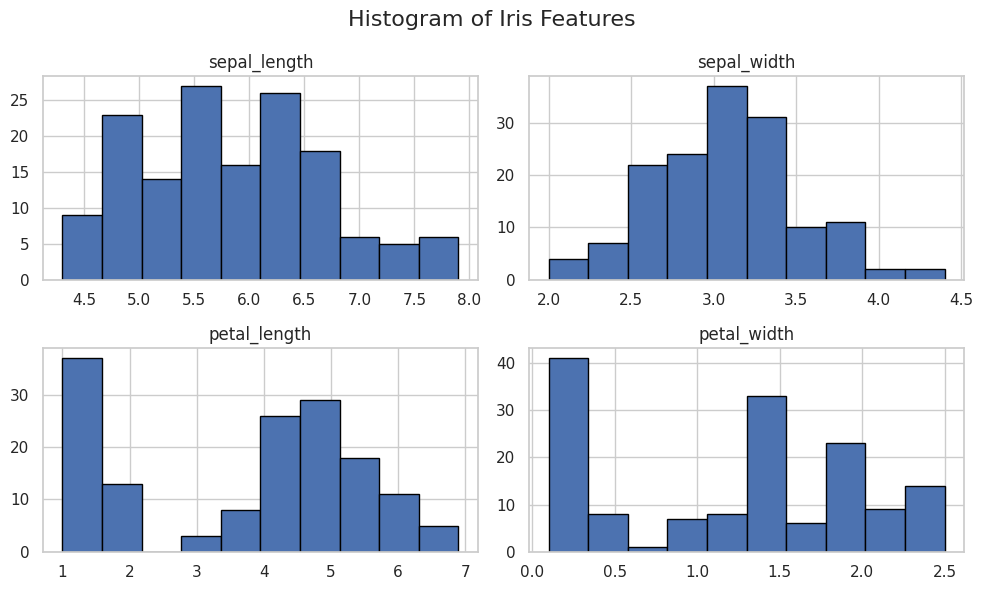

In [5]:
iris.hist(figsize=(10, 6), edgecolor='black')
plt.suptitle("Histogram of Iris Features", fontsize=16)
plt.tight_layout()
plt.show()


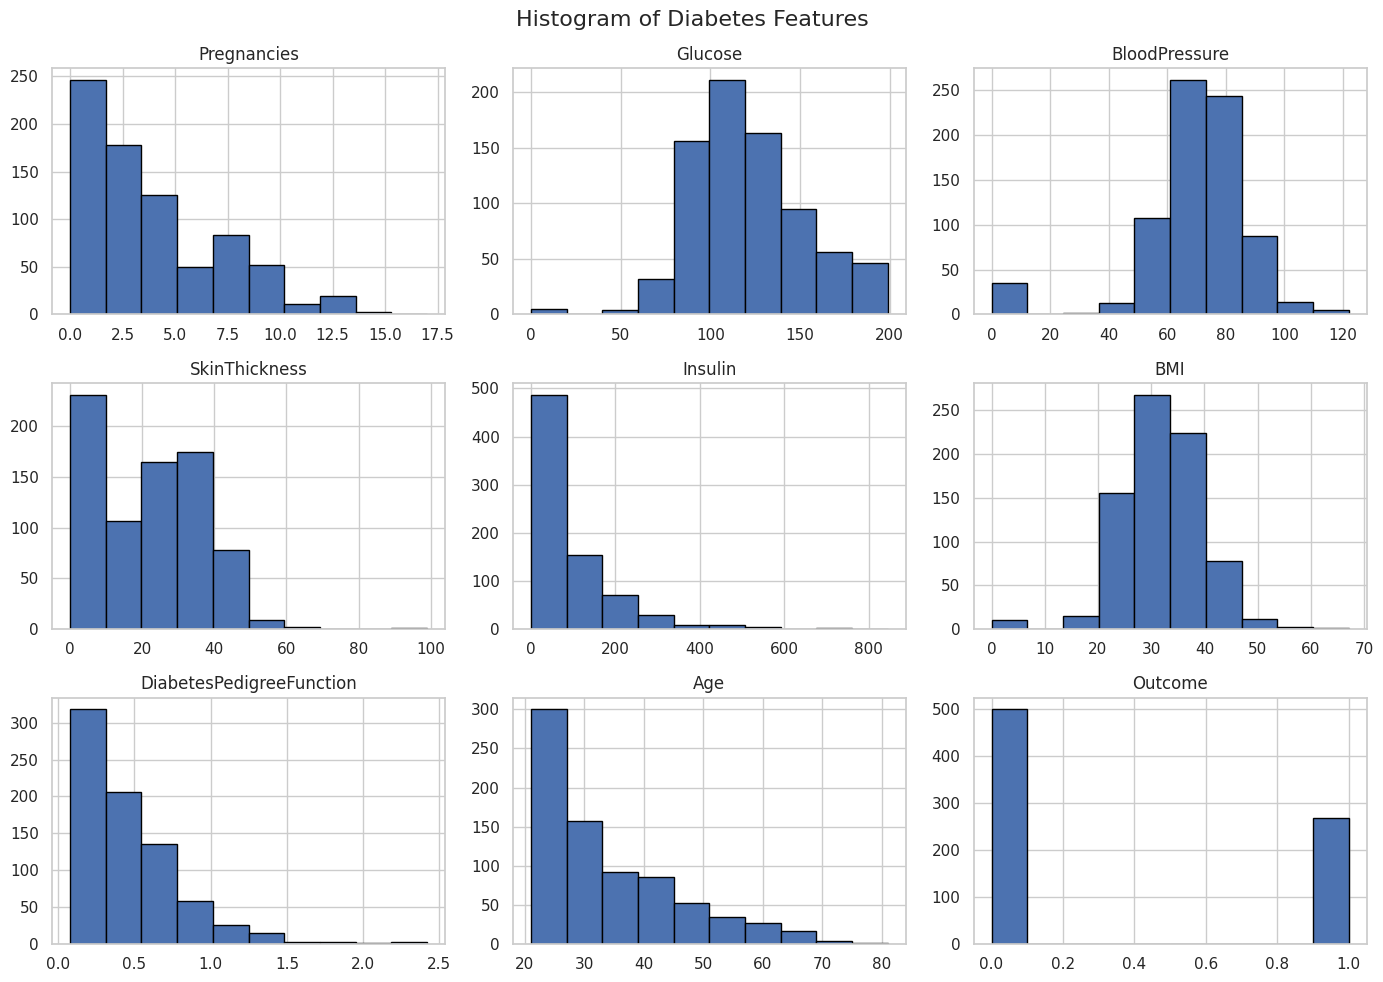

In [6]:
diabetes.hist(figsize=(14, 10), edgecolor='black')
plt.suptitle("Histogram of Diabetes Features", fontsize=16)
plt.tight_layout()
plt.show()


📌 Inference: Reveals skewness, outliers, and possible binning errors (like 0 values in Insulin).

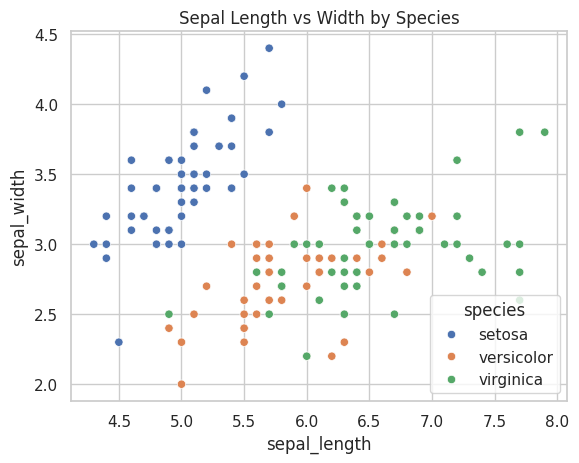

In [7]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Width by Species')
plt.show()


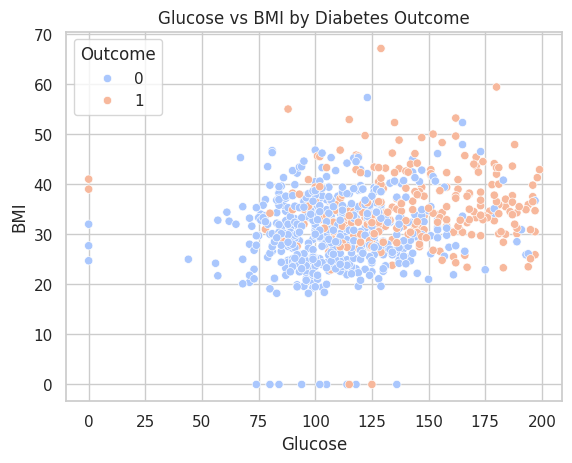

In [8]:
sns.scatterplot(data=diabetes, x='Glucose', y='BMI', hue='Outcome', palette='coolwarm')
plt.title('Glucose vs BMI by Diabetes Outcome')
plt.show()


📌 Inference: Scatter plots help reveal class separation or feature interactions.

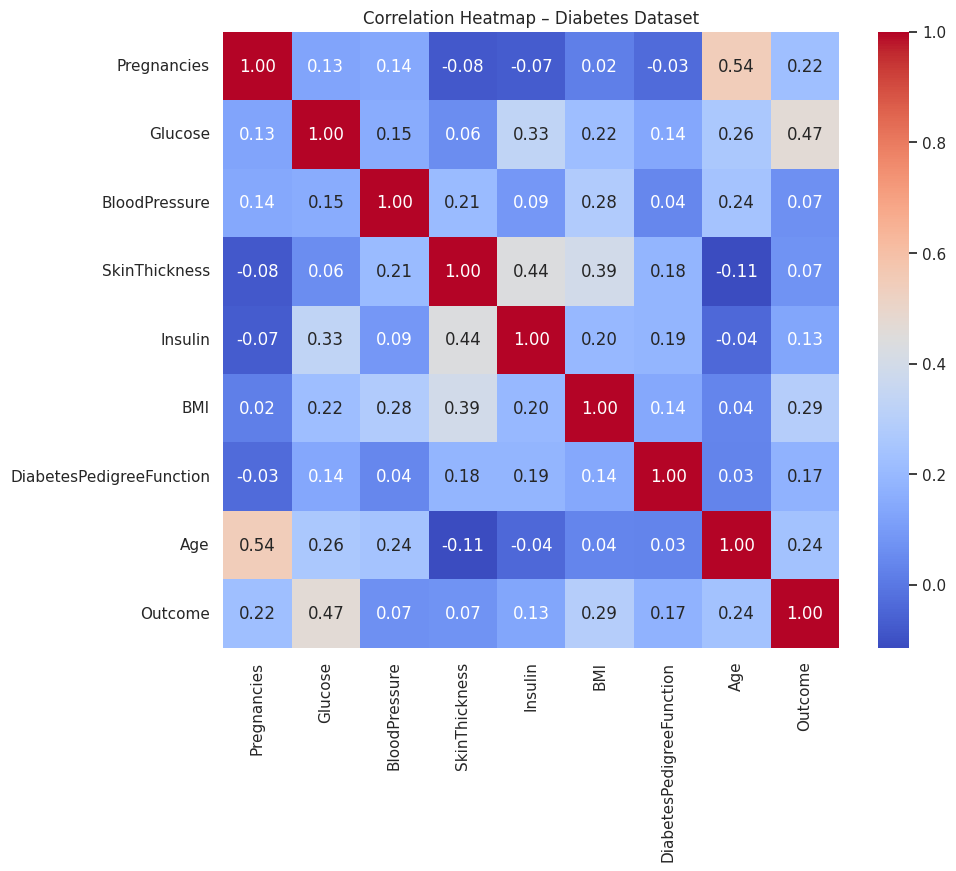

In [9]:
corr = diabetes.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap – Diabetes Dataset')
plt.show()


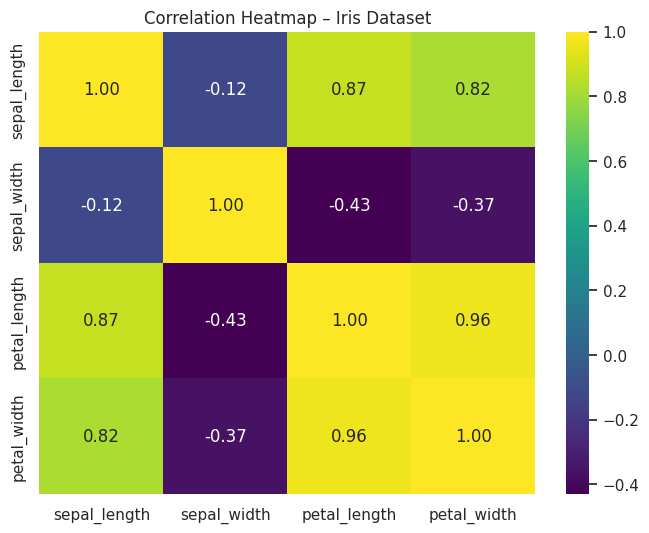

In [10]:
iris_corr = iris.drop(columns='species').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(iris_corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap – Iris Dataset')
plt.show()


📌 **Inference:**

In Diabetes, Glucose, BMI, and Age are positively correlated with Outcome.

In Iris, petal_length and petal_width are highly correlated — useful for classification.

# ***3. Answering Questions:***
- Utilize appropriate plots (bar plots, box plots, etc.) to address each of the ten questions listed
above.
- Provide interpretations or insights based on the visualized data.

/tmp/ipython-input-12-310950641.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AgeGroup', y='BloodPressure', ax=axes[1, 0], palette='pastel')
/tmp/ipython-input-12-310950641.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Age', ax=axes[2, 0], palette='Set2')
/tmp/ipython-input-12-310950641.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prevalence = df.groupby('AgeGroup')['Outcome'].mean() * 100
/tmp/ipython-input-12-310950641.py:38: FutureWarning: 

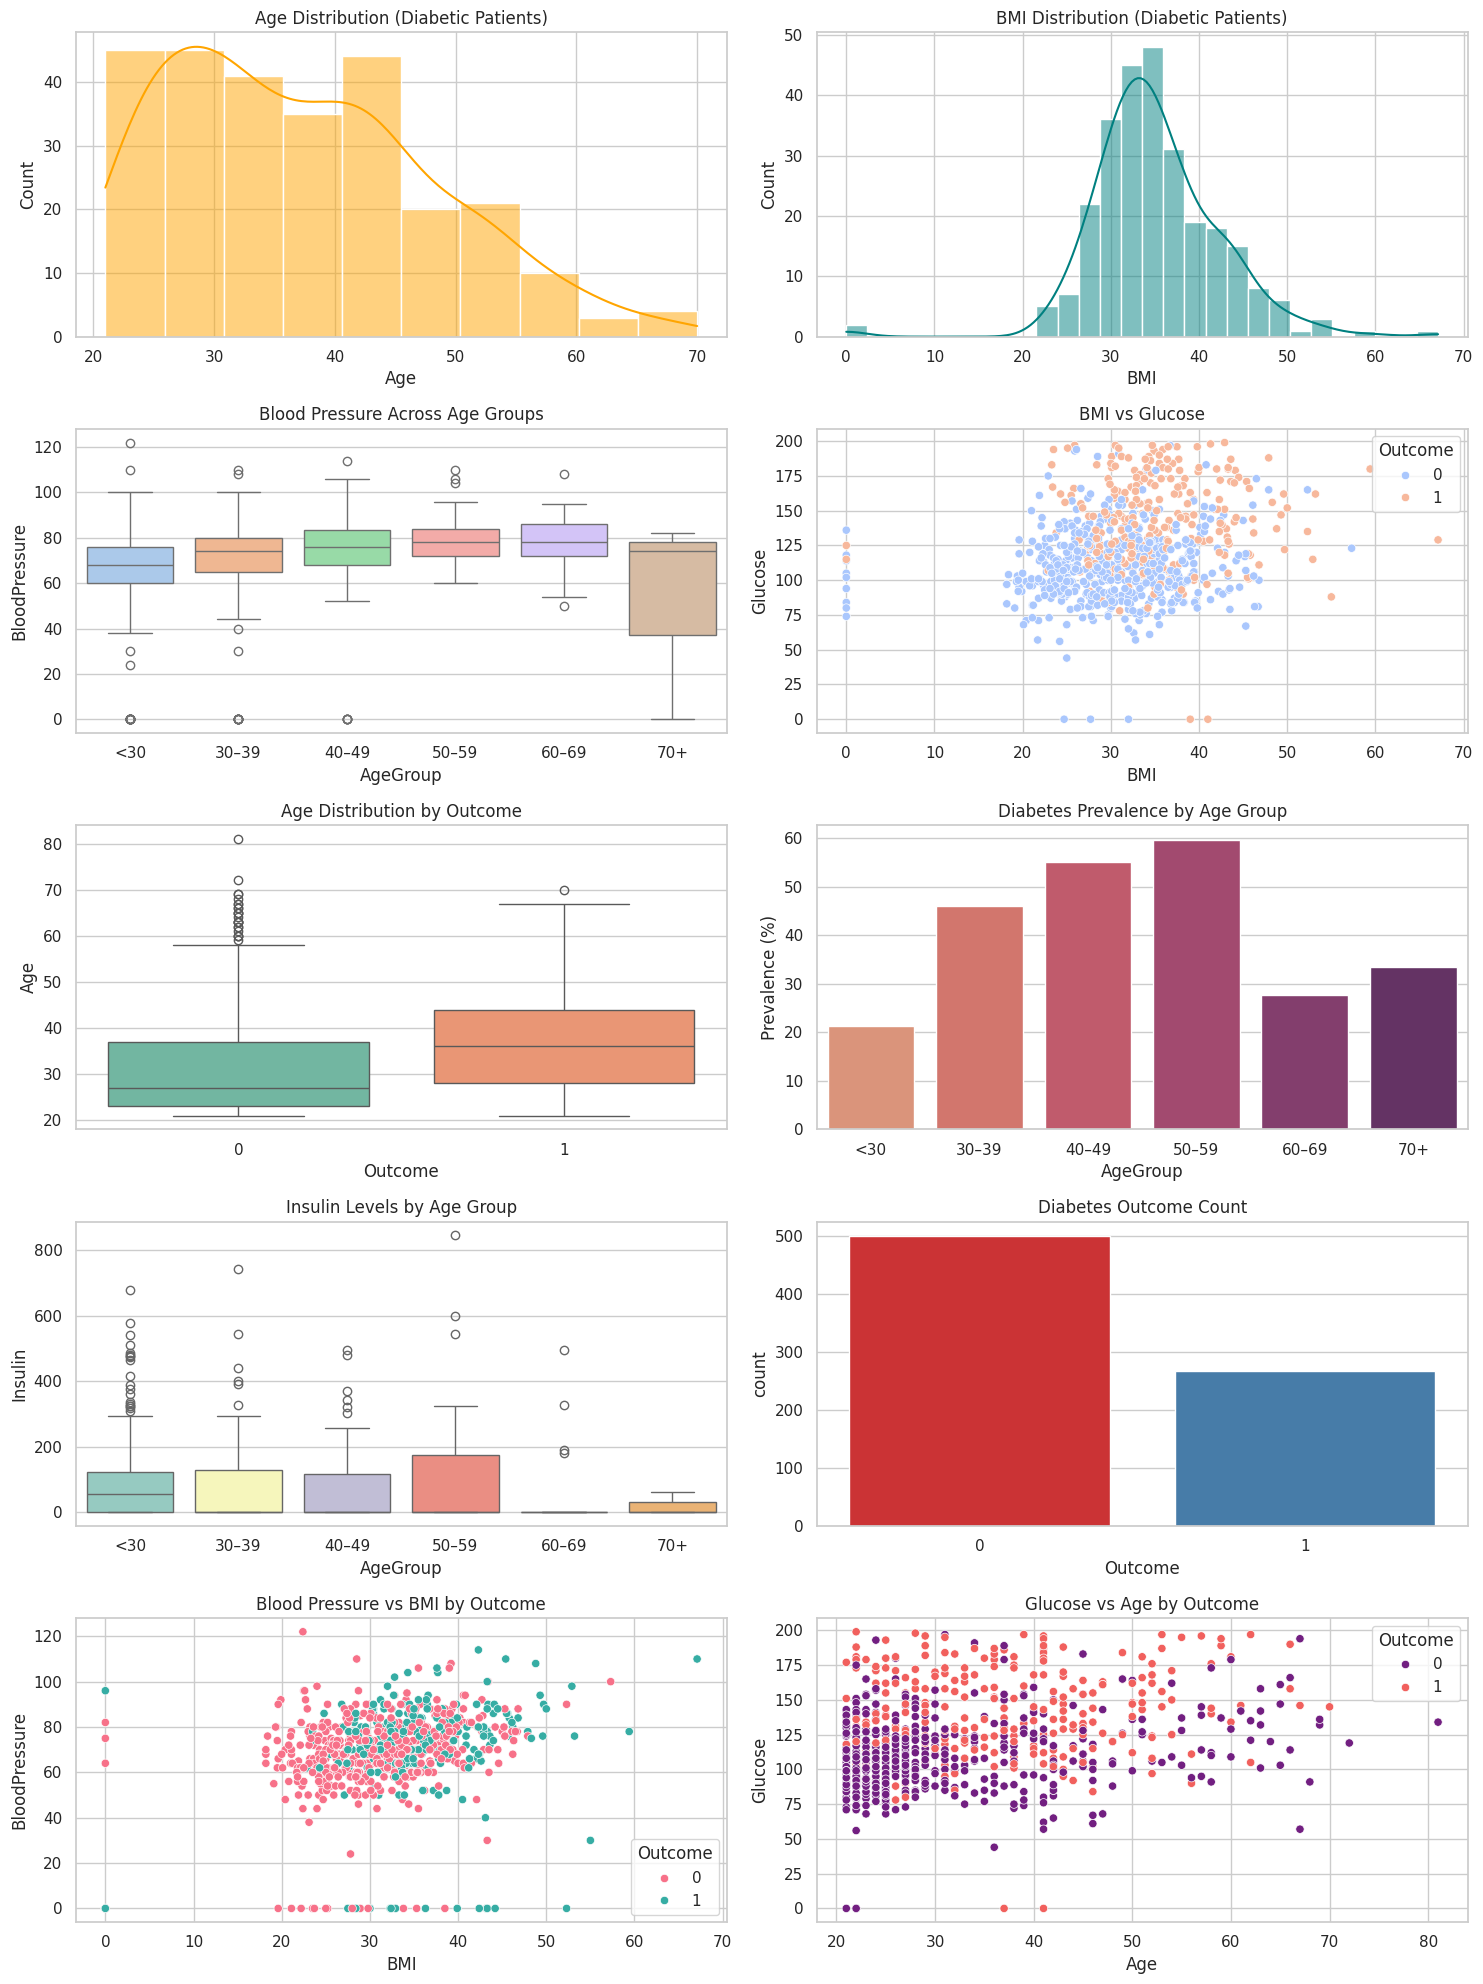

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('diabetes.csv')

# Create age group bins
bins = [0, 29, 39, 49, 59, 69, 100]
labels = ['<30', '30–39', '40–49', '50–59', '60–69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Set up a large canvas
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.set(style='whitegrid')

# 1. Age and BMI Distribution Among Diabetic Patients
sns.histplot(df[df['Outcome'] == 1]['Age'], kde=True, ax=axes[0, 0], color='orange')
axes[0, 0].set_title("Age Distribution (Diabetic Patients)")

sns.histplot(df[df['Outcome'] == 1]['BMI'], kde=True, ax=axes[0, 1], color='teal')
axes[0, 1].set_title("BMI Distribution (Diabetic Patients)")

# 2. Blood Pressure Across Age Groups
sns.boxplot(data=df, x='AgeGroup', y='BloodPressure', ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title("Blood Pressure Across Age Groups")

# 3. Correlation between BMI and Glucose
sns.scatterplot(data=df, x='BMI', y='Glucose', hue='Outcome', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title("BMI vs Glucose")

# 4. Age Distribution by Diabetes Outcome
sns.boxplot(data=df, x='Outcome', y='Age', ax=axes[2, 0], palette='Set2')
axes[2, 0].set_title("Age Distribution by Outcome")

# 5. Diabetes Prevalence by Age Group
prevalence = df.groupby('AgeGroup')['Outcome'].mean() * 100
sns.barplot(x=prevalence.index, y=prevalence.values, ax=axes[2, 1], palette='flare')
axes[2, 1].set_title("Diabetes Prevalence by Age Group")
axes[2, 1].set_ylabel("Prevalence (%)")

# 6. Insulin Distribution Across Age Groups
sns.boxplot(data=df, x='AgeGroup', y='Insulin', ax=axes[3, 0], palette='Set3')
axes[3, 0].set_title("Insulin Levels by Age Group")

# 7. Diabetes Outcome Distribution
sns.countplot(data=df, x='Outcome', ax=axes[3, 1], palette='Set1')
axes[3, 1].set_title("Diabetes Outcome Count")

# 8. BloodPressure vs BMI
sns.scatterplot(data=df, x='BMI', y='BloodPressure', hue='Outcome', ax=axes[4, 0], palette='husl')
axes[4, 0].set_title("Blood Pressure vs BMI by Outcome")

# 9. Glucose vs Age
sns.scatterplot(data=df, x='Age', y='Glucose', hue='Outcome', ax=axes[4, 1], palette='magma')
axes[4, 1].set_title("Glucose vs Age by Outcome")

plt.tight_layout()
plt.show()


1. Age Distribution (Diabetic Patients)
📊 Histogram of Age among Outcome = 1

Most diabetic patients are between 35 and 60 years old.

Fewer cases appear under 30 or over 65.

🔍 Inference: Diabetes is more common in middle-aged adults. Risk increases with age due to slower metabolism and insulin sensitivity decline.


2. BMI Distribution (Diabetic Patients)
📊 Histogram of BMI among Outcome = 1

Peaks around 30–35 BMI, with few diabetics below 25 (normal range).

🔍 Inference: A majority of diabetics are overweight or obese, confirming BMI as a key predictor.


3. Blood Pressure Across Age Groups
📊 Box Plot of BloodPressure by AgeGroup

Slightly higher median BP in older age groups (especially 50–69).

Large variability and outliers across all groups.

🔍 Inference: While blood pressure tends to rise with age, it's not a linear relationship — possibly due to treatment, genetics, or coexisting conditions.


4. Correlation Between BMI and Glucose
📊 Scatter Plot: BMI vs Glucose

Positive trend: Higher BMI often associates with higher glucose.

Diabetics (Outcome=1) cluster in the upper right (high BMI + high Glucose).

🔍 Inference: Strong interaction between obesity and glucose regulation, a hallmark of Type 2 diabetes.


5. Age Distribution by Diabetes Outcome
📊 Box Plot: Age by Outcome

Diabetics have higher median age and broader spread.

Non-diabetics skew younger.

🔍 Inference: Age is a strong influencing factor — older individuals more likely to be diabetic.


6. Diabetes Prevalence by Age Group
📊 Bar Plot: % with Outcome=1 in each AgeGroup

Prevalence jumps from <10% in <30 age group to nearly 50%+ in 50–69 group.

🔍 Inference: Clear increase in diabetes risk with age. This visual is a great feature engineering reference.


7. Insulin Levels Across Age Groups
📊 Box Plot of Insulin by AgeGroup

High number of zeros in all groups (likely missing).

Older groups show more variability and slightly higher median insulin.

🔍 Inference: Insulin levels don’t follow a consistent trend with age, but noise due to missing (zero) values reduces reliability.



8. Diabetes Outcome Distribution
📊 Bar Plot of Outcome (0/1)

Around 65% are non-diabetic, and 35% are diabetic.

🔍 Inference: There is moderate class imbalance that must be handled during model training.



9. Blood Pressure vs BMI by Outcome
📊 Scatter Plot

Diabetics tend to have higher BMI with slightly elevated blood pressure.

Large spread across both groups.

🔍 Inference: While BMI is a strong signal, blood pressure alone may not distinguish outcomes clearly without other features.



10. Glucose vs Age by Outcome
📊 Scatter Plot

Glucose tends to be higher in older age, especially among diabetics.

Diabetics cluster in high Glucose & mid-to-high Age areas.

🔍 Inference: Older individuals often show elevated glucose levels, confirming both as predictive of diabetes risk.



# ***4. Conclusion:***
- Summarize key findings and insights derived from the data visualization process.
- Discuss potential next steps for further analysis or investigation based on the observed
patterns.

🔍 Key Findings from Data Visualization:
Age and Diabetes Risk:

Majority of diabetic patients are aged 35–60.

Diabetes prevalence increases sharply with age, peaking in the 50–69 range.

BMI and Glucose – Strong Predictors:

Diabetics tend to have higher BMI (typically >30).

Glucose levels are strongly correlated with diabetes outcome; higher glucose clusters strongly with diabetic patients.

Blood Pressure and Insulin – Less Clear:

Blood pressure varies across age, but is not a strong standalone indicator of diabetes.

Insulin values contain many zeros, likely representing missing data, which reduces reliability without imputation.

Correlations:

Positive correlations exist between Glucose, BMI, Age, and Outcome.

Petal features (in Iris) and Glucose/BMI (in Diabetes) are the most informative for classification.

Class Imbalance:

Approximately 65% of patients are non-diabetic, indicating a moderate class imbalance that needs to be addressed in modeling.

# ***Iris Dataset Questions:***
- Address the following questions related to the Iris dataset using appropriate visualizations and
interpretations:
1. What is the distribution of sepal lengths and widths among the Iris species?

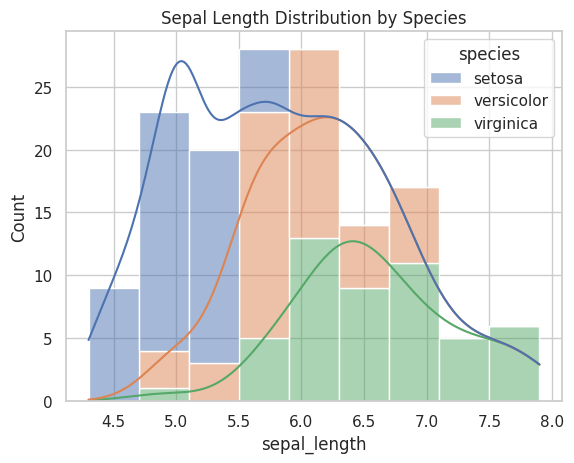

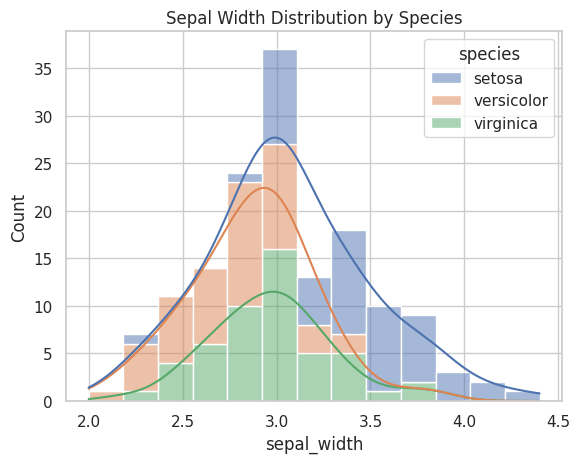

In [13]:
# Sepal Length
sns.histplot(data=iris, x='sepal_length', hue='species', kde=True, multiple='stack')
plt.title('Sepal Length Distribution by Species')
plt.show()

# Sepal Width
sns.histplot(data=iris, x='sepal_width', hue='species', kde=True, multiple='stack')
plt.title('Sepal Width Distribution by Species')
plt.show()


/tmp/ipython-input-14-1986430768.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='species', y='sepal_length', palette='Set2')


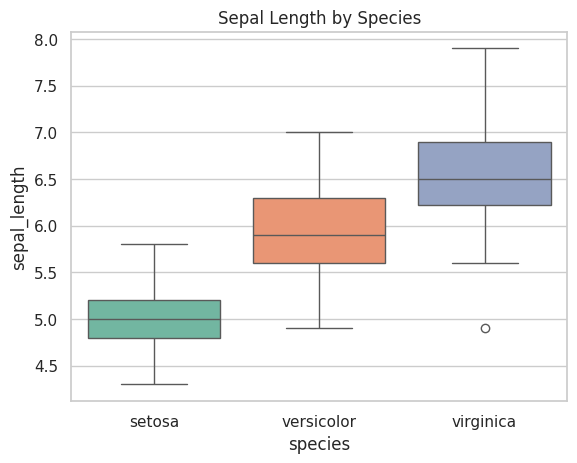

/tmp/ipython-input-14-1986430768.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='species', y='sepal_width', palette='Set3')


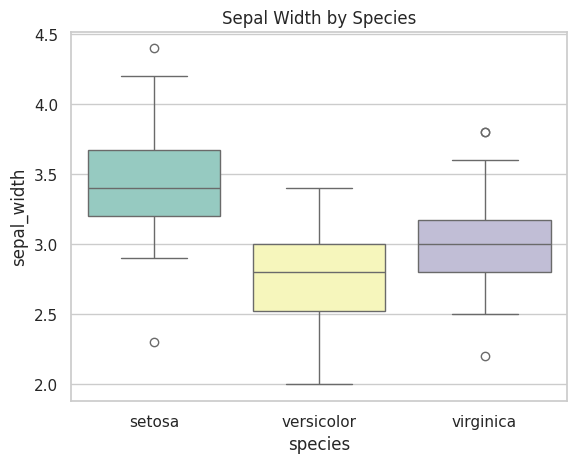

In [14]:
# Sepal Length
sns.boxplot(data=iris, x='species', y='sepal_length', palette='Set2')
plt.title('Sepal Length by Species')
plt.show()

# Sepal Width
sns.boxplot(data=iris, x='species', y='sepal_width', palette='Set3')
plt.title('Sepal Width by Species')
plt.show()


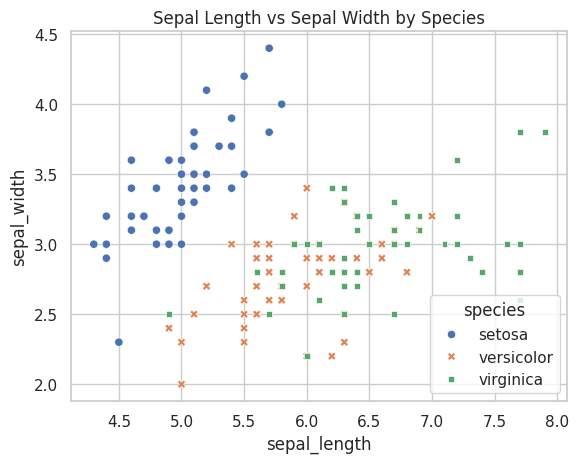

In [15]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', style='species')
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()


Sepal dimensions are useful features for distinguishing Setosa easily.

There's some overlap between Versicolor and Virginica, so combining with petal dimensions will give better separation.



2. How does the petal length vary across different Iris species?

/tmp/ipython-input-16-903627403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='species', y='petal_length', palette='Set2')


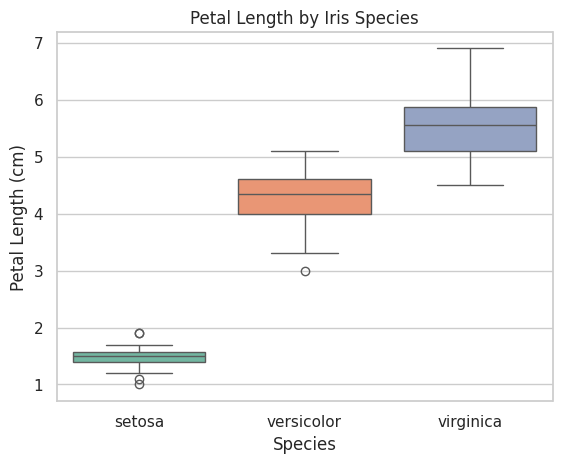

In [16]:
# Box plot
sns.boxplot(data=iris, x='species', y='petal_length', palette='Set2')
plt.title('Petal Length by Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

/tmp/ipython-input-17-73020560.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=iris, x='species', y='petal_length', palette='Set3')


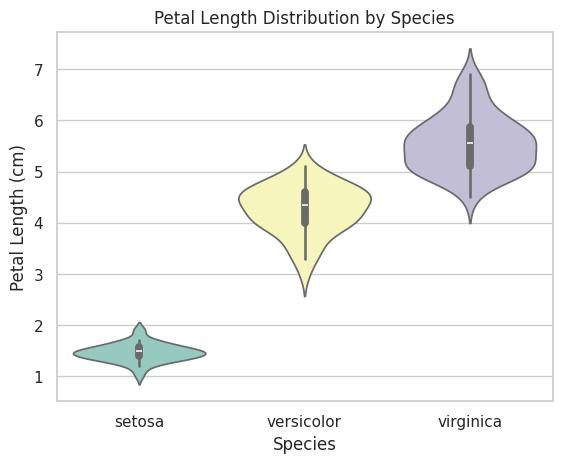

In [17]:
sns.violinplot(data=iris, x='species', y='petal_length', palette='Set3')
plt.title('Petal Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()


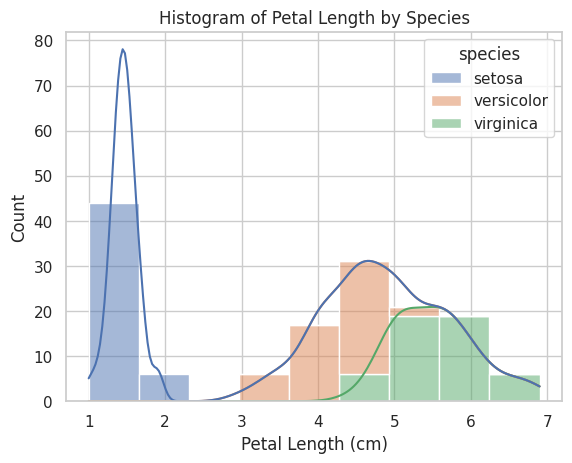

In [18]:
sns.histplot(data=iris, x='petal_length', hue='species', multiple='stack', kde=True)
plt.title('Histogram of Petal Length by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Count')
plt.show()


Setosa has short petal lengths, making it easily distinguishable.

Virginica and Versicolor overlap slightly, but Virginica generally has longer petals.

Petal length is one of the most discriminative features for Iris species classification — especially for separating Setosa from the rest.



3. Is there a relationship between sepal length and petal length?

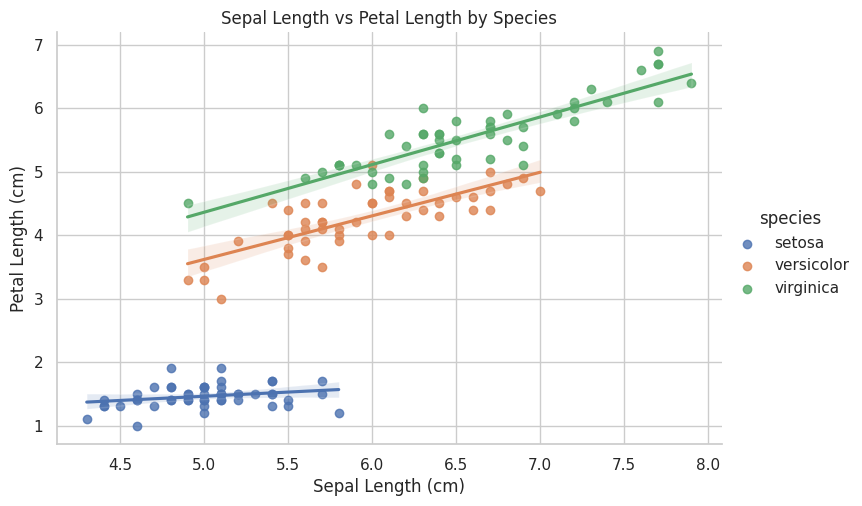

In [19]:
# Scatter plot with regression line
sns.lmplot(data=iris, x='sepal_length', y='petal_length', hue='species', aspect=1.5)
plt.title('Sepal Length vs Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [20]:
correlation = iris[['sepal_length', 'petal_length']].corr().iloc[0, 1]
print(f"Correlation between Sepal Length and Petal Length: {correlation:.2f}")


Correlation between Sepal Length and Petal Length: 0.87


Yes, there is a strong relationship between sepal length and petal length, especially in Versicolor and Virginica.

These features co-vary and can be useful predictors for classification models.

The relationship is non-linear for Setosa, suggesting Setosa is structurally different and easier to separate.

4. Are there any patterns observable in the pairwise relationships between features
(sepal length, sepal width, petal length, petal width)?

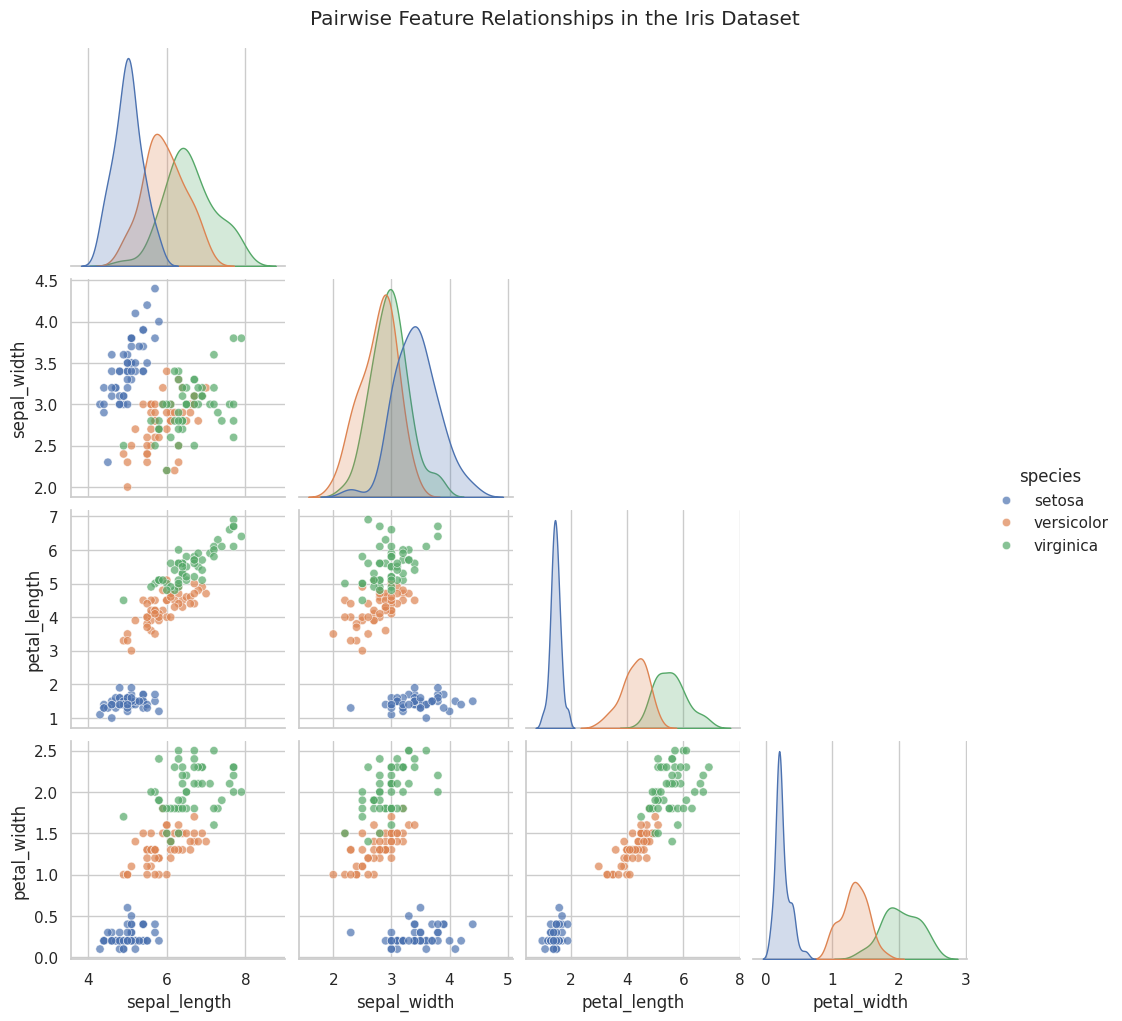

In [21]:
# Pair plot
sns.pairplot(iris, hue='species', corner=True, plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Feature Relationships in the Iris Dataset', y=1.02)
plt.show()

Petal features are more effective for species separation than sepal features.

Setosa is linearly separable from the other two species using petal measurements.

Versicolor and Virginica partially overlap, but still separable with combined features.

Sepal features offer limited separation, especially for Versicolor and Virginica.

5. Can we distinguish between Iris species based on sepal and petal measurements?

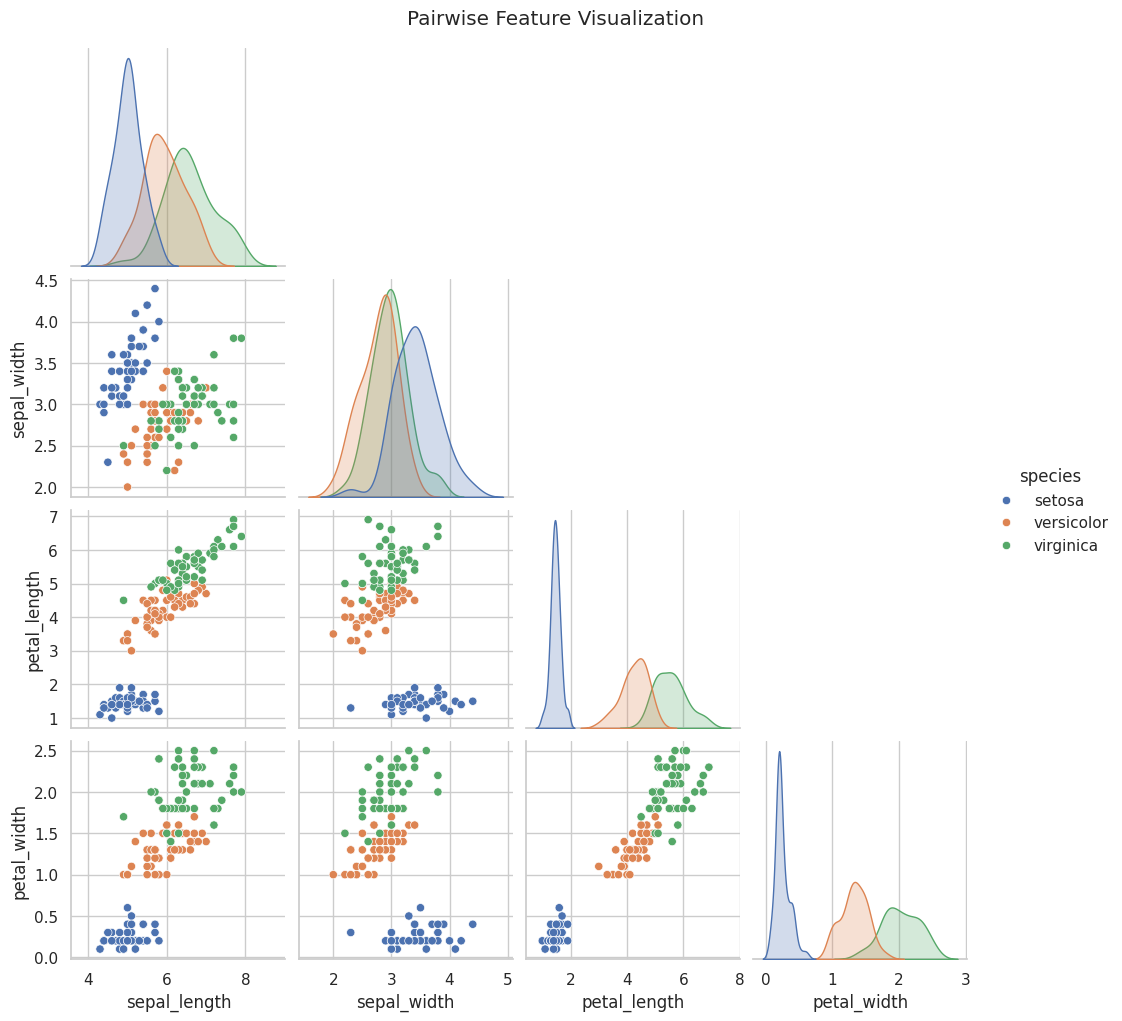

In [22]:
sns.pairplot(iris, hue='species', corner=True)
plt.suptitle("Pairwise Feature Visualization", y=1.02)
plt.show()


🔍 Inference:
Setosa is linearly separable in almost every petal-related plot.

Versicolor and Virginica show partial overlap, but are distinguishable using multiple features together.



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data
X = iris.drop(columns='species')
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



📌 Expected Outcome:
Accuracy ~97–100% — even a simple model can classify species with high precision.

Setosa is always perfectly classified.

Most confusion occurs between Versicolor and Virginica, but still highly accurate.

